# Forest Cover Type
Use cartographic variables to classify forest categories
## ML Checklist
1. Frame the Problem and look at the big picture.
2. Get Data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine learning algorithm.
5. Explore many different models and short-list the best ones.
6. Fine-tune models and combine them into a great solution.
7. Present your result.
8. Launch, monitor, and maintain your system.

## Frame The Problem
In this competition you are asked to predict the forest cover type (the predominant kind of tree cover) from cartographic variables. The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

My personal goal is to demonstrate my understanding of data exploration using methods in statistics and how to apply a variety of learning algorithms from scikit learn and then use tensorflow and compare the results.

## [Data](https://www.kaggle.com/c/forest-cover-type-kernels-only/data)
The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).
Data Fields

- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

## Data Exploration

In [1]:
# import lib
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/covtype.csv")
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


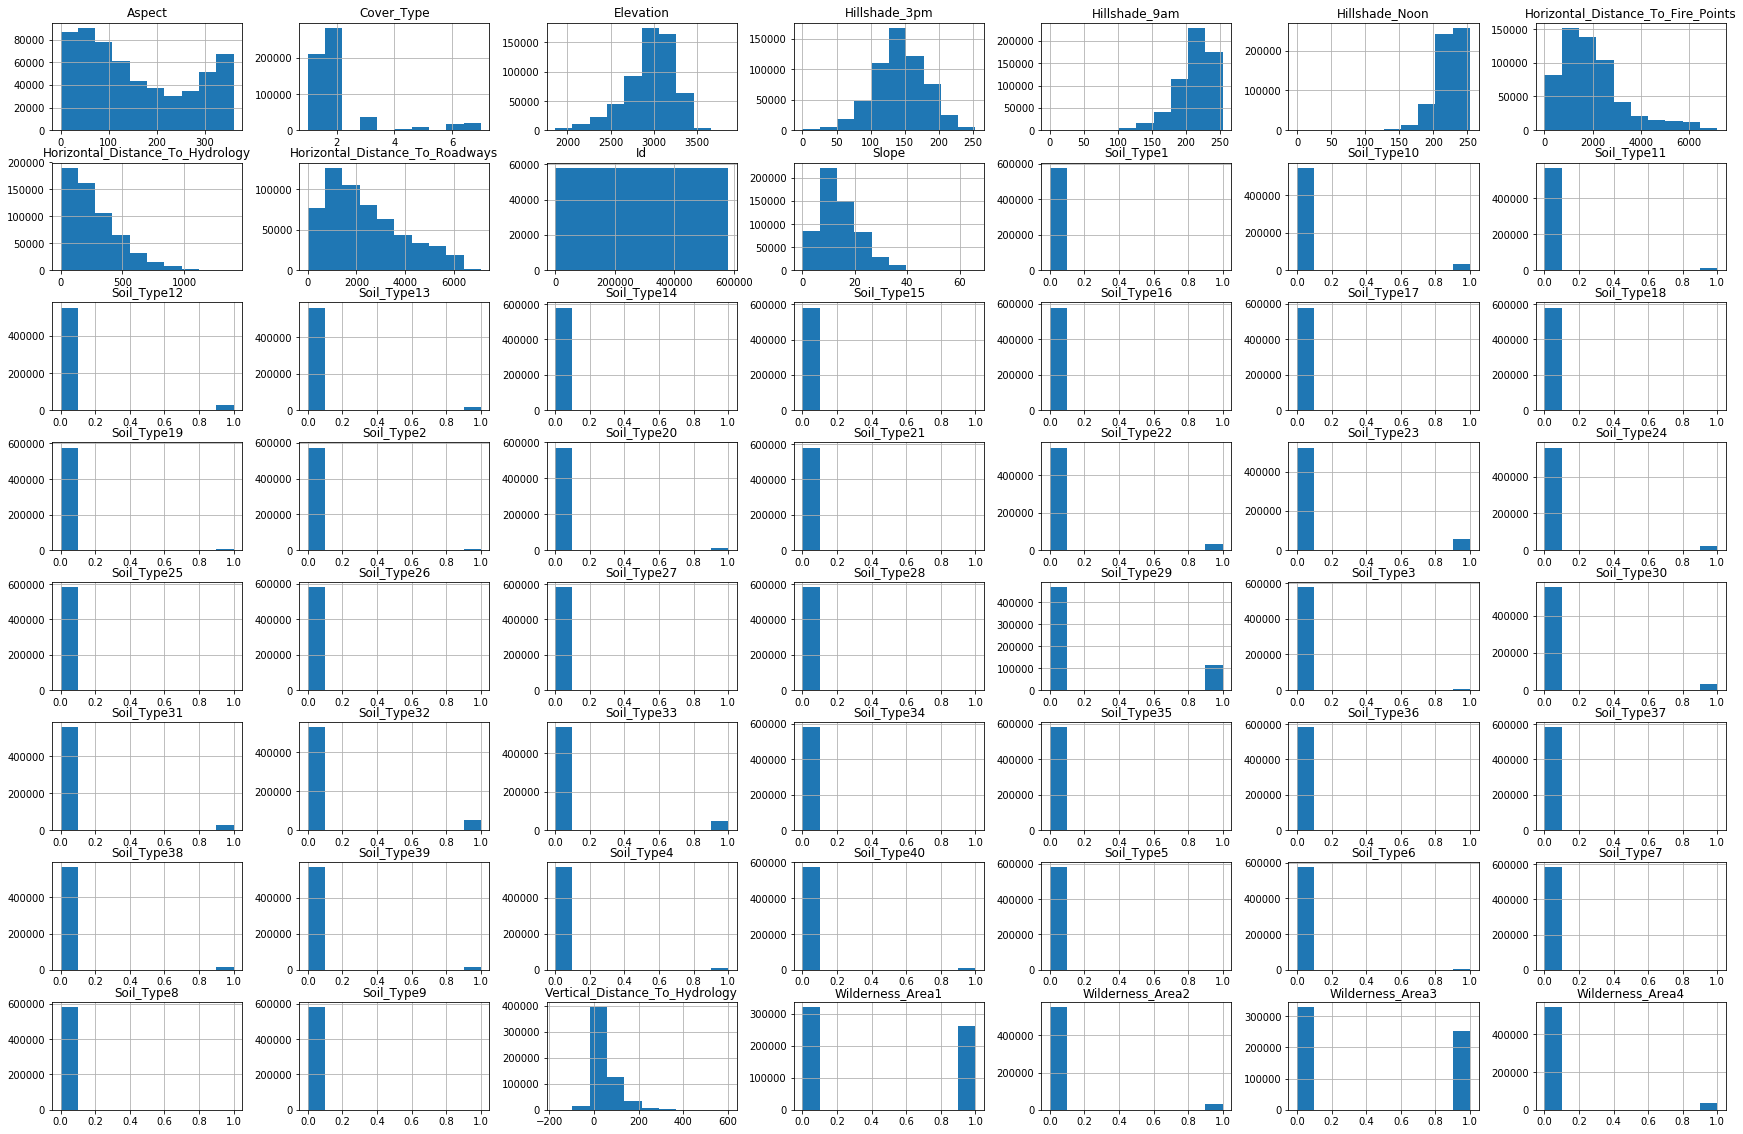

In [3]:
df.hist(bins=10,figsize=(30,20))
plt.show()

data seems normal, Wilderness_Area and Soil_Type are categorical variables which are onehot encoded. The first algoritghms will focus on non-categorical.

In [4]:
# more info
df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,290506.500000,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,167723.861639,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1.000000,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,145253.750000,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,290506.500000,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,435759.250000,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,581012.000000,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
noncat_df = df[[
    'Elevation', 
    'Aspect', 
    'Slope', 
    'Horizontal_Distance_To_Hydrology', 
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points',
    'Cover_Type'
]].copy()
noncat_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5


In [6]:
noncat_df["Cover_Type"].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

The cover_type are not evenly distributed, this may hurt the algorithm.

In [7]:
noncat_df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,-0.108936


In [8]:
# setting up train test split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(noncat_df, test_size=0.2)
train_set.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
200798,2893,58,24,295,-46,499,229,181,71,1987,2
360022,3149,261,6,342,37,1490,206,243,176,2315,1
325239,2958,128,16,300,69,1620,245,228,108,1879,2
76597,3014,86,12,201,46,3182,237,221,113,6189,2
567161,2862,193,17,30,-5,3408,216,251,164,1987,2


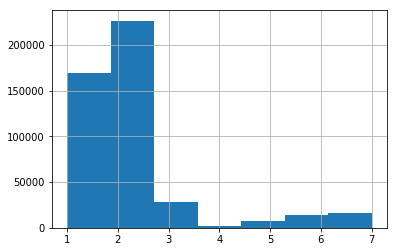

In [9]:
# checking if the split affected the distribution
train_set["Cover_Type"].hist(bins=7)

/home/thomas/PythonENV/deep-learning/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thomas/PythonENV/deep-learning/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/thomas/PythonENV/deep-learning/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Accuracy 95.392%
Precision 95.392%
F1 score 0.954
Confusion Matrix 



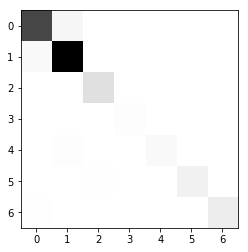

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, cr

train_x = train_set.drop("Cover_Type", axis=1) # drop labels for training set
train_y = train_set["Cover_Type"].copy()
test_x = test_set.drop("Cover_Type", axis=1) # drop labels for training set
test_y = test_set["Cover_Type"].copy()


pip_clf = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=200)
)

pip_clf.fit(train_x, train_y)
pred_test = pip_clf.predict(test_x)


print("Accuracy {:.3%}".format(accuracy_score(test_y, pred_test)))
print("Precision {:.3%}".format(precision_score(test_y, pred_test, average='micro')))
print("F1 score {:.3}".format(f1_score(test_y, pred_test, average='micro')))
print()
con_mat = confusion_matrix(test_y, pred_test)
print("Confusion Matrix \n")
plt.imshow(con_mat, cmap='binary', interpolation='None')
plt.show()

Looking at the above data it seems that we are doing well, F1 score is good and accuracy and precision. The confusion matrix shows where the false positive and false negatives are but nothing really jumps out, maybe 1 and zero are difficult to tell the difference.
So we can try gradient boosting or adaboosting

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


/home/thomas/PythonENV/deep-learning/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thomas/PythonENV/deep-learning/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/thomas/PythonENV/deep-learning/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Accuracy 95.304%
Precision 95.304%
F1 score 0.953
Confusion Matrix 



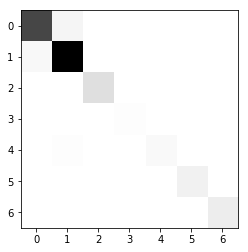

In [12]:
ada_clf = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=20),
        n_estimators=500
    )
)
ada_clf.fit(train_x, train_y)
pred_test = ada_clf.predict(test_x)

print("Accuracy {:.3%}".format(accuracy_score(test_y, pred_test)))
print("Precision {:.3%}".format(precision_score(test_y, pred_test, average='micro')))
print("F1 score {:.3}".format(f1_score(test_y, pred_test, average='micro')))
con_mat = confusion_matrix(test_y, pred_test)
print("Confusion Matrix \n")
plt.imshow(con_mat, cmap='binary', interpolation='None')
plt.show()

I was able to squeeze a bit more preformance, but not much. Now I will add the categorical variables to see if I get better preformance.

In [13]:
all_df = df.copy()
train_set, test_set = train_test_split(all_df, test_size=0.2)
item_to_scale = [
    'Elevation', 
    'Aspect', 
    'Slope', 
    'Horizontal_Distance_To_Hydrology', 
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]
train_set[item_to_scale] = StandardScaler().fit_transform(train_set[item_to_scale])
train_set.head()

/home/thomas/PythonENV/deep-learning/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/thomas/PythonENV/deep-learning/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/thomas/PythonENV/deep-learning/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/thomas/PythonENV/deep-learning/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is t

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
70450,70451,0.137325,-1.390382,-1.083146,0.255495,-0.573095,1.802746,-0.042992,0.236628,0.325860,...,0,0,0,0,0,0,0,0,0,2
336115,336116,1.166760,-0.523634,-0.147483,-0.421216,-1.258266,1.130865,1.078374,-0.117434,-0.902244,...,0,0,0,0,0,0,1,0,0,1
11758,11759,-0.595433,-0.881056,1.590178,0.255495,1.156961,-1.288420,0.555070,-2.444124,-2.051959,...,0,0,0,0,0,0,0,0,0,5
70597,70598,-0.716963,1.772803,0.119850,0.072219,-0.247639,-0.308514,-0.641054,-0.522075,0.325860,...,0,0,0,0,0,0,0,0,0,2
275879,275880,-0.195097,-1.354640,-0.414815,-0.703180,-0.350415,-0.324557,-0.229887,-0.168014,0.221341,...,1,0,0,0,0,0,0,0,0,5


Accuracy 52.312%
Precision 52.312%
F1 score 0.523
Confusion Matrix 



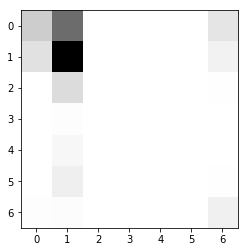

In [14]:
train_x = train_set.drop(["Cover_Type", "Id"], axis=1) # drop labels for training set
train_y = train_set["Cover_Type"].copy()
test_x = test_set.drop(["Cover_Type", "Id"], axis=1) # drop labels for training set
test_y = test_set["Cover_Type"].copy()

rf_clf = RandomForestClassifier(n_estimators=10)

rf_clf.fit(train_x, train_y)
pred_test = rf_clf.predict(test_x)


print("Accuracy {:.3%}".format(accuracy_score(test_y, pred_test)))
print("Precision {:.3%}".format(precision_score(test_y, pred_test, average='micro')))
print("F1 score {:.3}".format(f1_score(test_y, pred_test, average='micro')))
con_mat = confusion_matrix(test_y, pred_test)
print("Confusion Matrix \n")
plt.imshow(con_mat, cmap='binary', interpolation='None')
plt.show()

not really great results lets try others